##Exploratory Data Analysis


*Abirami Sivakumar*

---



Attribution: Parts of this notebook are adapted from Fraida Fund's 'Intro to ML' material. 

In this notebook
----------------
-   We learn a basic “recipe” for exploratory data analysis and apply it
    to an example.
-   Use Pandas, Matplotlib, and Seaborn to create simple plots.

We'll cover plotting line plots, scatter plots, bar plots, and histograms, and how to manipulate the style of your plots with Matplotlib

Introduction
------------

### What makes data “good”?

What makes a good data set?

-   **Quantity/Size**: the more *samples* are in the data set, the more examples
    your machine learning model will be able to learn from, and the
    better it will do. Often, a simple machine learning model trained on
    a large data set will outperform a “fancy” model on a small data
    set.
-   **Quality**: Are there *predictive* features in the data? Are no
    values (or very few values) missing, noisy, or incorrect? Is the
    scenario in which the data collected similar to the scenario in
    which your model will be used? These are examples of questions that
    we might ask to evaluate the quality of a data set.

One of the most important principles in machine learning is: **garbage
in, garbage out**. If the data you use to train a machine learning model
is problematic, or not well suited for the purpose, then even the best
model will produce useless predictions.


###🔎Exploratory data analysis (EDA) serves several important purposes:

-    *Detect and Correct Mistakes*: EDA helps us identify errors or inconsistencies in the data, such as missing values or outliers. By spotting these mistakes early on, we can take steps to correct them and ensure the data is reliable.

-    *Check Assumptions*: EDA allows us to validate our assumptions about the data. We can examine the distributions of variables and test whether they meet our expectations. If our assumptions are incorrect, it may influence our modeling approach.

-    *Identify Relationships Between Features*: EDA helps us uncover potential relationships or patterns between different features in the dataset. This can provide valuable insights into the underlying structure of the data and inform feature engineering decisions.

-    *Assess Relationships with Target Variable*: EDA enables us to explore the relationship between features and the target variable. Understanding the direction and magnitude of these relationships helps us assess the predictive power of the features and select the most relevant ones for our machine learning task.

🖊 “Recipe” for exploratory data analysis
--------------------------------------

We will practice using a basic “recipe” for exploratory data analysis.:

1.  *Define Expectations*: Clearly state your expectations and objectives for the EDA
process. Understand what you hope to achieve and what insights you're seeking from the data.

2.  *Load Data*: Begin by loading the dataset into your analysis environment, ensuring that it is loaded correctly and all necessary columns and rows are included.

3.  *Sanity Checks*: Perform sanity checks to ensure that the data aligns with your expectations. Check for data consistency, missing values, and any anomalies that may require cleaning or filtering.

4. *Clean and Preprocess*: Clean and preprocess the data as needed to address any issues identified during the sanity checks. This may involve handling missing values, removing outliers, or standardizing data formats.

5. *Explore Relationships*: Explore relationships within the data to identify potential features and target variables for further analysis. Use visualizations and statistical techniques to uncover patterns, correlations, and trends.

Example: Brooklyn Bridge Pedestrian Dataset
--------------------------------------------

The Brooklyn Bridge is a bridge that connects Brooklyn and Manhattan. It
supports vehicles, pedestrians, and bikers.

![](https://brooklyneagle.com/wp-content/uploads/2019/01/7-Brooklyn-Bridge-pedestrians-in-bike-lane-to-right-of-white-stripe-January-2019-photo-by-Lore-Croghan-600x397.jpg)

Suppose you are developing a machine learning model to predict the
volume of pedestrian traffic on the Brooklyn Bridge. There is a dataset
available that you think may be useful as training data: [Brooklyn
Bridge Automated Pedestrian Counts
dataset](https://data.cityofnewyork.us/Transportation/Brooklyn-Bridge-Automated-Pedestrian-Counts-Demons/6fi9-q3ta),
from the NYC Department of Transportation.

We will practice applying the “recipe” for exploratory data analysis to
this data.

We will use the `pandas` library in Python, which includes many powerful
utilities for managing data. You can refer to the [`pandas`
reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)
for more details on the `pandas` functions used in this notebook.

### Set down *expectations* about the data

The first step is to codify your expectations about the data *before*
you look at it:

-   Read about *methodology* and *data codebook*
-   How many rows and columns are in the data?
-   What does each variable mean? What units are data recorded in? What
    is the expected range or typical value for each column?
-   What variables do you think could be used as target variable? What
    variables could be used as features from which to learn?
-   How was data collected? Identify sampling issues, timeliness issues,
    fairness issues, etc.

For the Brooklyn Bridge dataset, you can review the associated
documentation on the NYC Data website:

-   [NYC Data
    Website](https://data.cityofnewyork.us/Transportation/Brooklyn-Bridge-Automated-Pedestrian-Counts-Demons/6fi9-q3ta)


### Load data and check that it is loaded correctly

The next step is to load the data in preparation for our exploratory
data analysis. Then, we’ll check that it is loaded correctly.

Some examples of the things we’ll look for include:

-   Does the `DataFrame` have the correct number of rows and columns?
-   Is the first row of “data” in the `DataFrame` real data, or is it
    column labels that were misinterpreted as data? (Similarly, are the
    column labels actually labels, or are they the first row of data?)

At this stage, we might also do some very basic manipulation of the data
- for example, compute some fields that are derived directly from other
fields. (For example, suppose you have a “distance” field in miles and
you wanted to convert it to meters - you could do that here!)

First, we will import some useful libraries:

-   In Python - libraries add powerful functionality
-   You can import an entire library (`import foo`) or part
    (`from foo import bar`)
  

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set up notebook to show all outputs in a cell, not only last one

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Now we are ready to read in our data!

❓: What are the 2 main types of data that Pandas supports?

In [32]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

We will want to verify that the data was loaded correctly. For *tabular*
data, we can start by looking at the first few rows of data or the last
few rows of data with the `head` and `tail` functions, respectively.
(For data that is not tabular, such as image, text, or audio data, we
would similarly start by looking at some samples.)

In [33]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [34]:
df.tail()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16056,07/23/2018 12:00:00 AM,Brooklyn Bridge,57,20,37,cloudy,75.0,0.0103,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


We can also get a few random rows:

In [35]:
df.sample(5)

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
13918,04/10/2018 04:00:00 PM,Brooklyn Bridge,1096,571,525,partly-cloudy-day,48.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
8250,04/27/2019 07:00:00 PM,Brooklyn Bridge,2063,789,1274,clear-day,58.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
14634,06/11/2018 07:00:00 AM,Brooklyn Bridge,240,98,142,partly-cloudy-day,58.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
7296,07/16/2019 11:00:00 AM,Brooklyn Bridge,1755,823,932,clear-day,84.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
8734,09/04/2019 07:00:00 AM,Brooklyn Bridge,315,140,175,cloudy,68.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


Looking at some rows can help us spot obvious problems with data
loading. For example, suppose we had tried to read in the data using a
tab delimiter to separate fields on the same row, instead of a comma.

In [36]:
df_bad  = pd.read_csv(url, sep='\t')
df_bad.head()

,"hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1"
0,"04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,,..."
1,"12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,..."
2,"12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,c..."
3,"12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12..."
4,"04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,c..."


This “bad” version of the `DataFrame` has only a single column (because
it believes tabs are used to separate fields in the same row, when
actually commas are used). The variable names are combined together into
one long column name. By looking at the first few rows of data, we can
spot this obvious error.

We should always check the shape of the data frame - the number of rows
and columns. This, too, should be checked against our assumptions about
the data (in this case, what we know from the NYC Data website.)

In [37]:
df.shape

(16057, 12)

Check the names of the columns and their data types:

In [38]:
df.columns
df.dtypes

Index(['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan',
       'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'Location1'],
      dtype='object')

hour_beginning        object
location              object
Pedestrians            int64
Towards Manhattan      int64
Towards Brooklyn       int64
weather_summary       object
temperature          float64
precipitation        float64
lat                  float64
long                 float64
events                object
Location1             object
dtype: object

We can also get a quick summary with `info()`;

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


`pandas` infers the data type of each column automatically from the
contents of the data.

If the data type of a column is not what you expect it to be, this can
often be a signal that the data needs cleaning. For example, if you
expect a column to be numeric and it is read in as non-numeric, this
indicates that there are probably some samples that include a
non-numeric value in that column. (The [NYC Data
website](https://data.cityofnewyork.us/Transportation/Brooklyn-Bridge-Automated-Pedestrian-Counts-Demons/6fi9-q3ta)
indicates what type of data *should* be in each column, so you should
reference that when checking this output. )

We have a date/time column (`hour_beginning`) that was read in as a
string. Let’s take a closer look at that. We can get one column of data
either using a notation like a dictionary, as in

``` python
df['hour_beginning']
```

or using class attribute-like notation, as in

``` python
df.hour_beginning
```

(either one returns exactly the same thing!) (Note that if the column
name includes spaces, you can only use the notation with the brackets,
since it encloses the column name in quotes and can accomodate spaces.)

`pandas` includes a `to_datetime` function to convert this string to a
“native” date/time format, so we can use that now:

In [40]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df.info()
df['hour_beginning'].head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.5+ MB


0   2019-04-30 00:00:00
1   2019-12-31 22:00:00
2   2019-12-31 23:00:00
3   2019-12-31 21:00:00
4   2019-04-01 03:00:00
Name: hour_beginning, dtype: datetime64[ns]

You may notice that the `hour_beginning` variable includes the full date
and time in one field. For our analysis, it would be more useful to have
separate fields for the date, month, day of the week, and hour.

We can create these additional fields by assigning the desired value to
them directly - then, observe the effect:

In [41]:
df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",22,12,2019-12-31,Tuesday
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",23,12,2019-12-31,Tuesday
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",21,12,2019-12-31,Tuesday
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,4,2019-04-01,Monday


### Inspect (and possibly clean/filter) the data

Now we are ready to inspect the data.

-    Missing Values: We need to check if there are any missing values in the data. Sometimes, certain rows might have missing information, which can be represented as 'None', 'NaN', or even '0' or '-1'. It's essential to distinguish between actual missing values and valid values like '0' or '-1'.

-    Numeric Fields: For numerical fields, we'll look at the minimum and maximum values of each field. We'll also check if the median falls within our expected range.

-    Non-Numeric Fields: For non-numeric fields, we'll check the number of unique values in each field and ensure they match our expectations. We'll also examine the consistency of factor levels throughout the data.

-    Variable Relationships: We'll assess if the relationships between variables align with our expectations. This can involve visual evaluation and examining summary statistics.

-     Time Series Data: If the data is a time series, we'll analyze the trend of each variable over time and ensure it aligns with our expectations.

These checks may require some domain knowledge. Having a good understanding of the subject matter related to the data is crucial for setting reasonable expectations about the values and relationships within the dataset..

#### Check whether data is complete

Let us start by checking whether the data is complete. First, we’ll
check whether there are any rows in the data where some or all fields
are missing.

We can see the number of missing values in each column by summing up all
the instances where the `isnull` function returns a True value:

In [42]:
df.isnull().sum()

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary         16
temperature             16
precipitation           16
lat                      0
long                     0
events               14933
Location1                0
hour                     0
month                    0
date                     0
day_name                 0
dtype: int64

(Note that this only tells us about missing values that are explicitly
denoted as such - for example, explicit `NaN` values. If a missing value
is coded as something else - like a 0 or -1 - we wouldn’t know unless we
noticed an unusually high frequency of 0 or -1 values.)

We notice that the majority of rows are missing a value in the `events`
field, which is used to mark dates that are holidays or other special
events. This is reasonable, since most dates do not have any remarkable
events.

Let’s look at the rows that *do* have a value in the `events` field. To
filter a dataframe, we’ll use the `.loc[]` operator. This accepts either
an index (for example, we can do `df.loc[0]` to see the first record in
the dataframe), an array of indices (for example, `df.loc[[0,1,2]]`), or
an array of boolean values the length of the entire dataframe. That’s
what we’ll use here.

In [43]:
df.loc[df['events'].notnull()]

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
5,2019-12-25 14:00:00,Brooklyn Bridge,3171,1685,1486,clear-day,44.0,0.0000,40.708164,-73.999509,Christmas Day,"(40.7081639691088, -73.9995087014816)",14,12,2019-12-25,Wednesday
65,2019-10-31 00:00:00,Brooklyn Bridge,13,11,2,cloudy,61.0,0.0000,40.708164,-73.999509,Halloween,"(40.7081639691088, -73.9995087014816)",0,10,2019-10-31,Thursday
76,2019-03-17 23:00:00,Brooklyn Bridge,1,0,1,clear-night,37.0,0.0000,40.708164,-73.999509,St. Patrick's Day,"(40.7081639691088, -73.9995087014816)",23,3,2019-03-17,Sunday
78,2019-02-18 16:00:00,Brooklyn Bridge,1439,622,817,partly-cloudy-day,40.0,0.0002,40.708164,-73.999509,Presidents' Day (regional holiday),"(40.7081639691088, -73.9995087014816)",16,2,2019-02-18,Monday
89,2019-09-02 01:00:00,Brooklyn Bridge,0,0,0,partly-cloudy-night,69.0,0.0000,40.708164,-73.999509,Labor Day,"(40.7081639691088, -73.9995087014816)",1,9,2019-09-02,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15962,2018-07-04 16:00:00,Brooklyn Bridge,2726,2726,0,partly-cloudy-day,82.0,0.0133,40.708164,-73.999509,Independence Day,"(40.7081639691088, -73.9995087014816)",16,7,2018-07-04,Wednesday
15990,2018-07-04 12:00:00,Brooklyn Bridge,2010,1073,937,partly-cloudy-day,84.0,0.0000,40.708164,-73.999509,Independence Day,"(40.7081639691088, -73.9995087014816)",12,7,2018-07-04,Wednesday
15997,2018-06-17 23:00:00,Brooklyn Bridge,353,168,185,clear-night,74.0,0.0000,40.708164,-73.999509,Father's Day,"(40.7081639691088, -73.9995087014816)",23,6,2018-06-17,Sunday
16017,2018-06-17 03:00:00,Brooklyn Bridge,16,11,5,clear-night,66.0,0.0000,40.708164,-73.999509,Father's Day,"(40.7081639691088, -73.9995087014816)",3,6,2018-06-17,Sunday


We also notice a small number of rows missing weather information. It’s
not clear why these are missing. Let’s take a closer look at some of
those rows, by *filtering* the dataframe to only rows that meet a
specific condition - in this case, that the `temperature` field is
missing.

In [45]:
df.loc[df.temperature.isnull()]   #Return values where temp is not null

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday
482,2019-01-06 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-06,Sunday
701,2019-11-03 01:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time ends,"(40.7081639691088, -73.9995087014816)",1,11,2019-11-03,Sunday
2140,2019-01-14 00:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-14,Monday
2604,2019-01-09 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-09,Wednesday
2944,2019-03-10 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,"(40.7081639691088, -73.9995087014816)",2,3,2019-03-10,Sunday
3951,2019-01-16 00:00:00,Brooklyn Bridge,7,2,5,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-16,Wednesday
4198,2019-05-02 00:00:00,Brooklyn Bridge,3,2,1,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,5,2019-05-02,Thursday
5206,2019-09-17 00:00:00,Brooklyn Bridge,2,2,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,9,2019-09-17,Tuesday
5277,2019-06-17 01:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,6,2019-06-17,Monday


We can see that for these particular instances, all of the weather
information is missing. There’s no obvious reason or pattern. We’ll deal
with these soon, when we try to clean/filter the data.

Before we do that, though, let’s check for the *other* kind of missing
data: rows that are missing completely, that we expect *should* be
present.

In this example, the data is a time series, and we expect that there is
exactly one row of data for every single hour over the time period in
which this data was collected.

Let’s see if the data is complete, or if there are gaps in time.

First, we will use
[`pd.date_range`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)
to get the list of hour intervals that we expect to find in the dataset.
Then, we will find the difference between this list and the actual list
of hour intervals in the dataset - these are missing intervals.

In [46]:
# get beginning and end of date range
min_dt = df.hour_beginning.min()
max_dt = df.hour_beginning.max()
print(min_dt)
print(max_dt)

2017-10-01 00:00:00
2019-12-31 23:00:00


In [47]:
expected_range = pd.date_range(start = min_dt, end = max_dt, freq='H' )
expected_range

DatetimeIndex(['2017-10-01 00:00:00', '2017-10-01 01:00:00',
               '2017-10-01 02:00:00', '2017-10-01 03:00:00',
               '2017-10-01 04:00:00', '2017-10-01 05:00:00',
               '2017-10-01 06:00:00', '2017-10-01 07:00:00',
               '2017-10-01 08:00:00', '2017-10-01 09:00:00',
               ...
               '2019-12-31 14:00:00', '2019-12-31 15:00:00',
               '2019-12-31 16:00:00', '2019-12-31 17:00:00',
               '2019-12-31 18:00:00', '2019-12-31 19:00:00',
               '2019-12-31 20:00:00', '2019-12-31 21:00:00',
               '2019-12-31 22:00:00', '2019-12-31 23:00:00'],
              dtype='datetime64[ns]', length=19728, freq='H')

In [48]:
# then identify the missing hours
missing_hours = expected_range.difference(df['hour_beginning'])
print(missing_hours)

DatetimeIndex(['2018-08-01 00:00:00', '2018-08-01 01:00:00',
               '2018-08-01 02:00:00', '2018-08-01 03:00:00',
               '2018-08-01 04:00:00', '2018-08-01 05:00:00',
               '2018-08-01 06:00:00', '2018-08-01 07:00:00',
               '2018-08-01 08:00:00', '2018-08-01 09:00:00',
               ...
               '2018-12-31 14:00:00', '2018-12-31 15:00:00',
               '2018-12-31 16:00:00', '2018-12-31 17:00:00',
               '2018-12-31 18:00:00', '2018-12-31 19:00:00',
               '2018-12-31 20:00:00', '2018-12-31 21:00:00',
               '2018-12-31 22:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', length=3672, freq=None)


We had the expected number of rows (the output of `shape` matched the
description of the data on the NYC Data website), but the data seems to
be missing samples from August 2018 through December 2018, which is
worth keeping in mind if we decide to use it:

#### Handle missing values

Now that we have evaluated the “completeness” of our data, we have to
decide what to do about missing values.

Some machine learning models cannot tolerate data with missing values.
Depending on what *type* of data is missing and *why* it is missing, we
can

-   drop rows with missing values from the dataset
-   fill in (“impute”) the missing values with some value: a 0, the mode
    of that column, the median of that column, or forward/back fill data
    from the nearest row that is not missing

Given the temporal nature of the data and the relatively slow changes in the weather variable over time, let's consider using the *forward/back fill* method to handle missing values. This approach is logical since consecutive observations in time are likely to have similar weather conditions.

To implement this method, we'll need to arrange the data in chronological order. It's important to note that the original dataset was not sorted by time, so we'll need to sort it first before applying the forward/back fill method.

In [49]:
df = df.sort_values(by='hour_beginning') #Arranging data in chronological order first and then proceeding to forward/back fill
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
8846,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
9473,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
10098,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
10733,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
11527,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


We can also “reset” the index now, so that if we ask for `df.loc[0]`
we’ll get the first row in time, and so on.

In [50]:
df.reset_index(drop=True, inplace=True)  #drop=True discards the current index, inplace=True applies changes to the df
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday


Now we can fill in missing data using the `fillna` function
([reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)).
We will fill the missing weather data using the “forward fill” method,
which caries the last valid observation forward to fill in NAs.

In [51]:
df['temperature'] = df['temperature'].fillna(method="ffill")
df['precipitation'] = df['precipitation'].fillna(method="ffill")
df['weather_summary'] = df['weather_summary'].fillna(method="ffill")


Having imputed missing vaules in the weather-related columns, we can
count the NAs again and find that there are only missing values in the
`events` column.

In [52]:
df.isnull().sum()

hour_beginning           0
location                 0
Pedestrians              0
Towards Manhattan        0
Towards Brooklyn         0
weather_summary          0
temperature              0
precipitation            0
lat                      0
long                     0
events               14933
Location1                0
hour                     0
month                    0
date                     0
day_name                 0
dtype: int64

#### Validating expectations


Now that we have assessed the data's completeness, let's turn our attention to evaluating the consistency of the data values with our expectations.

To begin, we'll examine summary statistics. The "five-number summary" – including extremes (minimum and maximum values), median, and quartiles – provides valuable insights into numeric fields within the data. This summary allows us to assess whether the values fall within reasonable ranges. We can leverage the describe function in pandas to compute this summary.

In [53]:
df.describe()

,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long,hour,month
count,16057.000000,16057.000000,16057.000000,16057.000000,16057.000000,16057.000000,1.605700e+04,16057.000000,16057.000000
mean,687.106309,334.772436,352.286853,53.205892,0.004613,40.708164,-7.399951e+01,11.499346,6.347076
std,862.244605,417.807545,456.624509,18.036476,0.023389,0.000000,2.842259e-14,6.922682,3.544812
min,0.000000,0.000000,0.000000,2.000000,0.000000,40.708164,-7.399951e+01,0.000000,1.000000
25%,16.000000,9.000000,5.000000,39.000000,0.000000,40.708164,-7.399951e+01,5.000000,3.000000
50%,227.000000,112.000000,111.000000,53.000000,0.000000,40.708164,-7.399951e+01,11.000000,6.000000
75%,1254.000000,611.000000,632.000000,69.000000,0.000000,40.708164,-7.399951e+01,17.000000,10.000000
max,4330.000000,3657.000000,2872.000000,97.000000,0.680400,40.708164,-7.399951e+01,23.000000,12.000000


We can only compute those summary statistics for numerical variables.
For categorical variables, we can use `value_counts()` to get frequency
of each value.

For example, let’s see how often each `weather` condition occurs, and
whether it is reasonable for NYC:

In [54]:
df.weather_summary.value_counts()

clear-night            3755
partly-cloudy-day      3169
clear-day              3127
partly-cloudy-night    2508
cloudy                 2383
rain                    920
snow                     93
fog                      76
sleet                    14
wind                     12
Name: weather_summary, dtype: int64

It’s also useful to verify expected relationships.

For example, we expect to see precipitation when the weather is rainy.
We can use `groupby` in `pandas` to capture the effect between a
categorical variable (`weather_summary`) and a numerical one,
`precipitation`:

In [55]:
df.groupby('weather_summary')['precipitation'].describe()   #It computes summary statistics for the 'precipitation' values within each group.

,count,mean,std,min,25%,50%,75%,max
weather_summary,,,,,,,,
clear-day,3127.0,0.000235,0.001193,0.0000,0.000000,0.0000,0.000000,0.0241
clear-night,3755.0,0.000055,0.000455,0.0000,0.000000,0.0000,0.000000,0.0157
cloudy,2383.0,0.001705,0.005100,0.0000,0.000000,0.0000,0.000500,0.1090
fog,76.0,0.003432,0.005740,0.0000,0.000000,0.0009,0.003650,0.0246
partly-cloudy-day,3169.0,0.000839,0.002985,0.0000,0.000000,0.0000,0.000000,0.0480
partly-cloudy-night,2508.0,0.000904,0.003619,0.0000,0.000000,0.0000,0.000000,0.1000
rain,920.0,0.065898,0.071727,0.0006,0.025500,0.0433,0.080150,0.6804
sleet,14.0,0.061729,0.066759,0.0089,0.029025,0.0399,0.056975,0.2284
snow,93.0,0.025419,0.030711,0.0013,0.011500,0.0168,0.026700,0.2029


Make special note of the `count` column, which shows us the prevalence
of different weather conditions in this dataset. There are some weather
conditions for which we have very few examples.

Similarly, we can validate our expectation of hotter weather in the
summer months:

In [56]:
df.groupby('month')['temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,1488.0,31.140457,11.459811,2.0,24.0,31.0,39.00,60.0
2,1344.0,37.706101,9.723386,10.0,31.0,37.0,43.00,75.0
3,1488.0,39.809140,7.925757,18.0,34.0,39.0,45.00,69.0
4,1440.0,50.865278,9.304510,31.0,43.0,51.0,57.25,79.0
5,1488.0,63.358199,9.183699,43.0,56.0,63.0,69.00,90.0
6,1440.0,71.056250,7.499476,52.0,66.0,71.0,76.00,91.0
7,1488.0,77.695565,6.300003,62.0,73.0,77.0,82.00,97.0
8,744.0,74.668011,5.929941,61.0,71.0,74.0,79.00,90.0
9,720.0,69.451389,6.882513,50.0,64.0,69.0,74.00,88.0


as well as during the middle of the day:

In [57]:
df.groupby('hour')['temperature'].describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,669.0,51.230194,17.075762,5.0,37.0,52.0,67.0,86.0
1,670.0,50.617910,16.990729,4.0,37.0,51.0,66.0,85.0
2,669.0,50.067265,16.900022,3.0,36.0,50.0,65.0,84.0
3,669.0,49.538117,16.860571,3.0,36.0,50.0,64.0,83.0
4,669.0,49.049327,16.771776,3.0,35.0,50.0,64.0,82.0
5,669.0,48.606876,16.708742,2.0,35.0,49.0,63.0,82.0
6,669.0,48.330344,16.668034,2.0,35.0,49.0,63.0,81.0
7,669.0,48.627803,16.997460,2.0,34.0,49.0,64.0,83.0
8,669.0,49.760837,17.303981,3.0,36.0,50.0,65.0,85.0


##Data Visualization

Data visualization is a powerful tool used to explore, analyze, and communicate insights from data. It involves representing data visually through charts, graphs, and plots to uncover patterns, trends, and relationships that may not be immediately apparent from raw data alone

#### 1. Pairplot

For tabular data with multiple numeric features, it is often useful to
create a *pairplot*. A pairplot shows pairwise relationships between all
numerical variables. It is a useful way to identify variables that have
a relationship.

We can create a pairplot with Seaborn library like so :

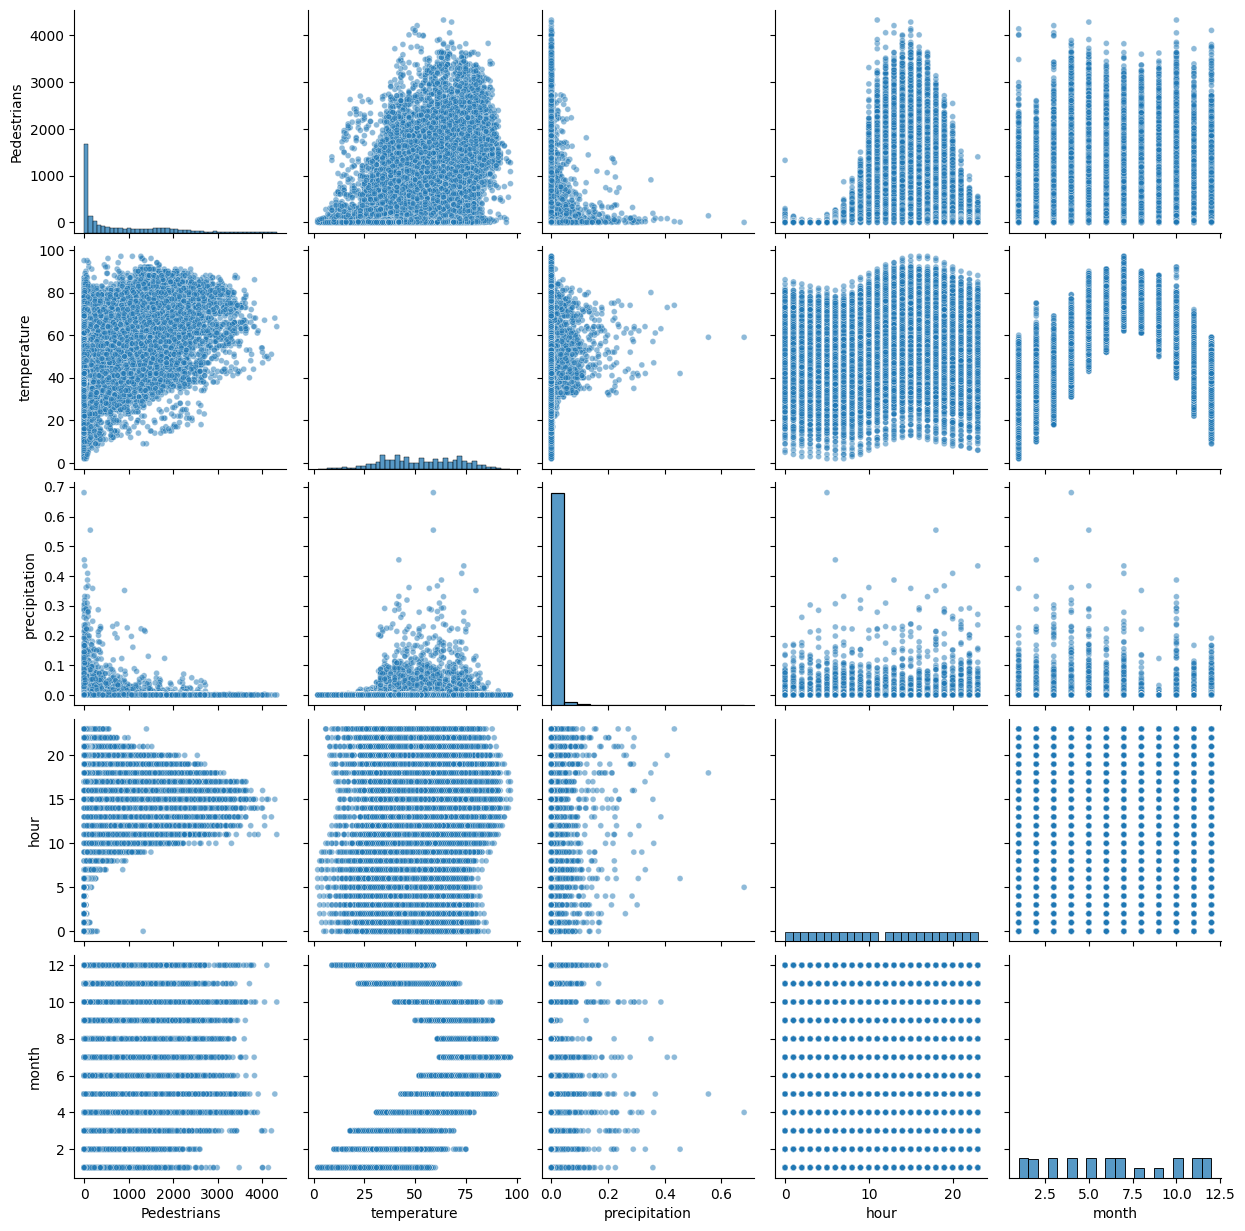

In [58]:
sns.pairplot(df,
             vars=['Pedestrians', 'temperature', 'precipitation', 'hour', 'month'],
             plot_kws={'alpha':0.5, 'size': 0.1})

Here, each pane shows one numerical variable on the x-axis and another
numerical variable on the y-axis, so that we can see if a relationship
exists between them. The panes along the diagonal shows the empirical
distribution of values for each feature in this data.

But, it is difficult to see anything useful because there is so much
going on in this plot. We can improve things somewhat by:

-   specifying only the variables we want to include, and exluding
    variables that don’t contain useful information, such as `lat` and
    `long`, and
-   making the points on the plot smaller and partially transparent, to
    help with the overplotting.

We’ll also change the histograms on the diagonal, which show the
frequency of values for each variable, into a density plot which shows
the same information in a more useful format.

This plot validates the relationship between `temperature` and `hour`,
and between `temperature` and `month`. However, we can also use this
plot to identify useful features - features that appear to be related to
the `target` variable.

#### 2. Histogram : Show the distribution of a numerical variable




<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Pedestrians', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Pedestrians on Brooklyn Bridge')

Text(0.5, 0, 'Pedestrian Count')

Text(0, 0.5, 'Frequency')

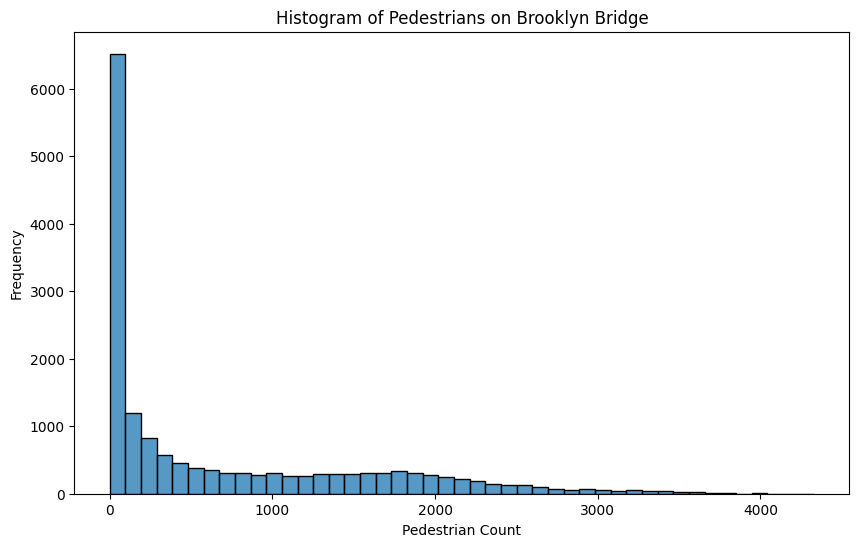

In [59]:
# Plotting a histogram of pedestrian counts
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pedestrians')
plt.title('Histogram of Pedestrians on Brooklyn Bridge')
plt.xlabel('Pedestrian Count')
plt.ylabel('Frequency')
plt.show()

#### 3. Scatterplot: Graphical representation used to display the relationship between two continuous variables.

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Scatterplot of Temperature vs Pedestrian Counts')

Text(0.5, 0, 'Temperature')

Text(0, 0.5, 'Pedestrian Count')

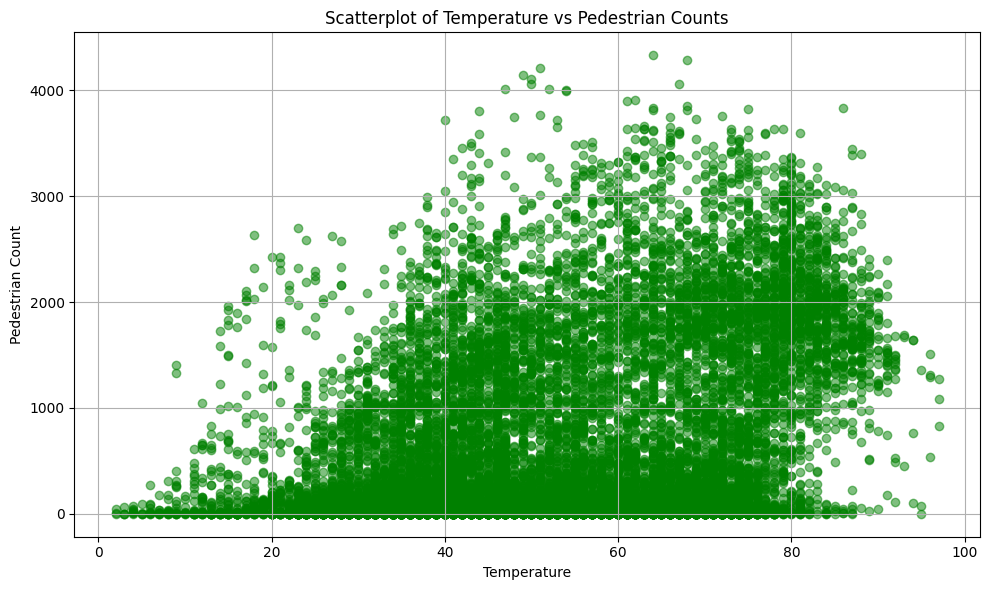

In [60]:
# Generating a scatterplot of temperature against pedestrian counts
plt.figure(figsize=(10, 6))
plt.scatter(df['temperature'], df['Pedestrians'], color='green', alpha=0.5)  #alpha controls the transparency of markers
plt.title('Scatterplot of Temperature vs Pedestrian Counts')
plt.xlabel('Temperature')
plt.ylabel('Pedestrian Count')
plt.grid(True) #Adds a grid to the data
plt.tight_layout()  #Prevents overlapping elements
plt.show()


#### 4. Bar Graph: Show a numerical comparison across different categories



<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='hour'>

Text(0.5, 1.0, 'Total Pedestrian Counts by Hour')

Text(0.5, 0, 'Hour of the Day')

Text(0, 0.5, 'Pedestrian Count')

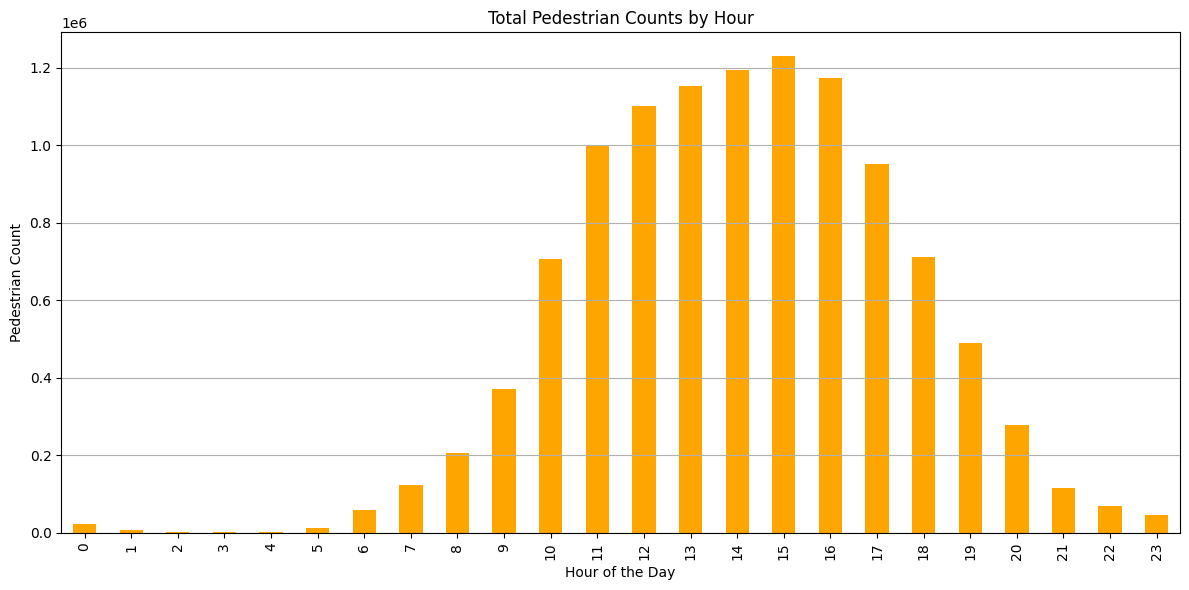

In [61]:
# Aggregating pedestrian counts by hour and plotting a bar graph
hourly_counts = df.groupby(df['hour'])['Pedestrians'].sum()
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar', color='orange')
plt.title('Total Pedestrian Counts by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Pedestrian Count')
plt.grid(axis='y')  #grid created alone y axis
plt.tight_layout()
plt.show()


#### 5.Line Plot : Show the trend of a numerical variable over time

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian Counts Over Time')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Pedestrian Count')

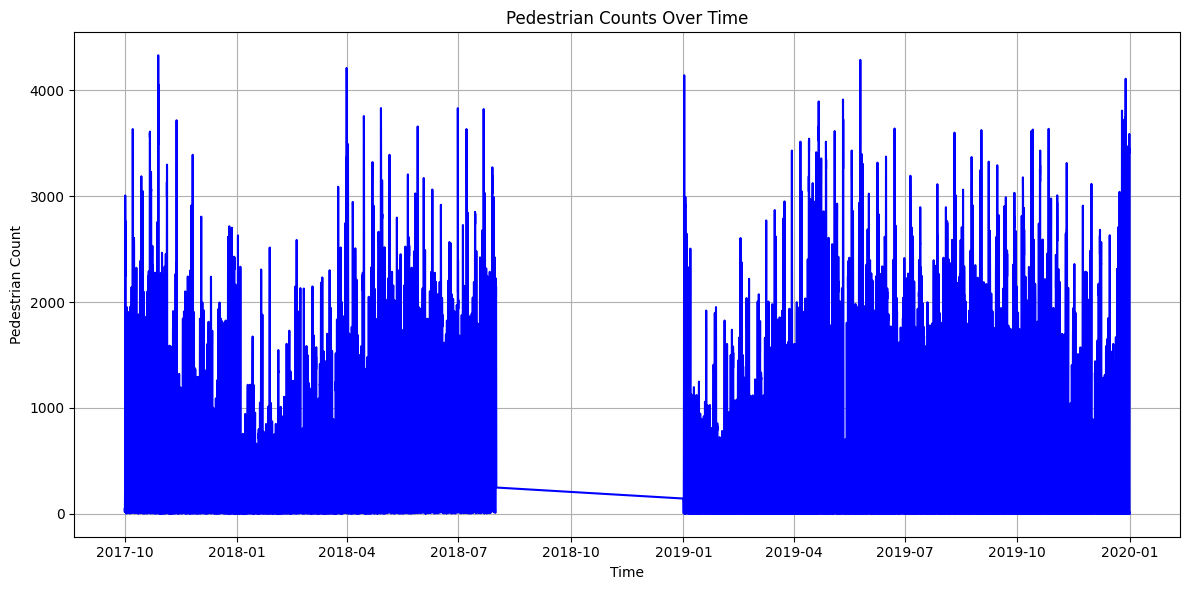

In [62]:

# Plotting a line plot of pedestrian counts over time
plt.figure(figsize=(12, 6))
plt.plot(df['hour_beginning'], df['Pedestrians'], color='blue')
plt.title('Pedestrian Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 6. Box Plot : Show quartiles (and outliers) for one or more numerical variables

We can use boxplots to quickly summarize distributions.

Five-number summary:

min = minimum value
25% = first quartile (Q1) = median of the lower half of the data
50% = second quartile (Q2) = median of the data
75% = third quartile (Q3) = median of the upper half of the data
max = maximum value
(It's more useful than mean and standard deviation for describing skewed distributions.)

Interquartile Range (IQR) = Q3 - Q1

Outliers:

below Q1 - 1.5 * IQR
above Q3 + 1.5 * IQR

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='weather_summary', ylabel='Pedestrians'>

Text(0.5, 1.0, 'Pedestrian Counts by Weather Summary')

Text(0.5, 0, 'Weather Summary')

Text(0, 0.5, 'Pedestrian Count')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'clear-night'),
  Text(1, 0, 'partly-cloudy-night'),
  Text(2, 0, 'clear-day'),
  Text(3, 0, 'partly-cloudy-day'),
  Text(4, 0, 'rain'),
  Text(5, 0, 'cloudy'),
  Text(6, 0, 'wind'),
  Text(7, 0, 'fog'),
  Text(8, 0, 'snow'),
  Text(9, 0, 'sleet')])

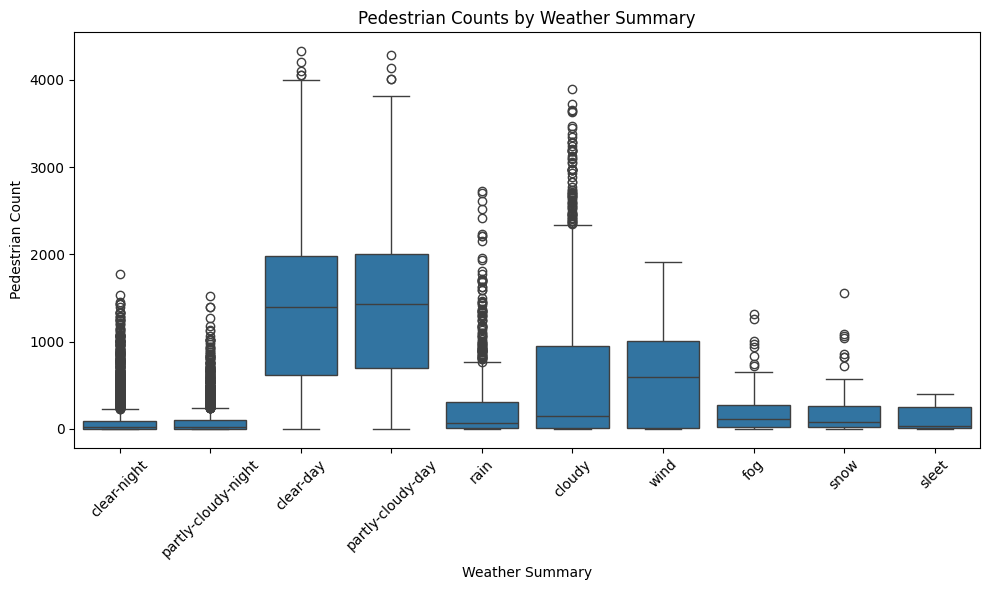

In [63]:

# Plotting a box plot of pedestrian counts by weather summary
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weather_summary', y='Pedestrians')
plt.title('Pedestrian Counts by Weather Summary')
plt.xlabel('Weather Summary')
plt.ylabel('Pedestrian Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 7. Heatmap : When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Pedestrians, Temperature, and Precipitation')

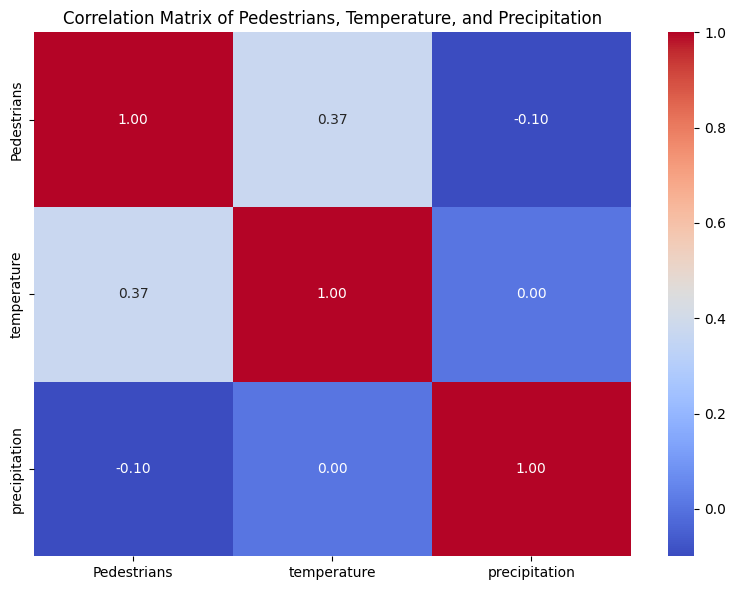

In [64]:
# Creating a correlation matrix
correlation_matrix = df[['Pedestrians', 'temperature', 'precipitation']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians, Temperature, and Precipitation')
plt.tight_layout()
plt.show()


A correlation coefficient of -0.10 suggests that there is a very slight tendency for pedestrian counts to decrease slightly when there is more precipitation. However, the correlation is weak, meaning that precipitation alone may not be a strong predictor of pedestrian counts, and other factors likely play a more significant role.

A correlation coefficient of 0.37 suggests that there is a moderate tendency for pedestrian counts to increase as the temperature increases. However, it's essential to consider other factors that may also influence pedestrian behavior, as the correlation does not imply causation.

Now armed with information about these relationships, we can identify
good candidate features for a machine learning model.